# PME3481 - Controle e Aplicações

## Métodos de Ziegler-Nichols

### Preparção do Ambiente

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ctl

### Métodos de Ziegler-Nichols

In [2]:
def ziegler_nichols_open_loop(G):
    # Step response of the open-loop system
    T, yout = ctl.step_response(G)
    
    # Find the slope of the step response at its steepest point
    dydt = np.gradient(yout, T)
    max_slope_index = np.argmax(dydt)
    max_slope = dydt[max_slope_index]
    
    # Find the delay time (L) and time constant (T)
    L = T[max_slope_index]
    T = (yout[-1] - yout[0]) / max_slope
    
    # Calculate Ziegler-Nichols PID parameters
    Kp = 1.2 * (T / L)
    Ti = 2 * L
    Td = 0.5 * L
    
    Ki = Kp / Ti
    Kd = Kp * Td
    
    return Kp, Ki, Kd

def ziegler_nichols_closed_loop(G):
    # Initial proportional gain
    Kp = 1.0
    
    # Increase Kp until the system oscillates
    while True:
        pid = ctl.TransferFunction([0, Kp, 0], [1])
        system = ctl.feedback(pid * G, 1)
        T, yout = ctl.step_response(system)
        
        # Check for sustained oscillations
        if np.max(yout) > 1.1 * np.min(yout):
            break
        Kp += 0.1
    
    Ku = Kp
    Pu = 2 * np.pi / np.arccos(-1 / (Ku * ctl.dcgain(G)))
    
    # Calculate Ziegler-Nichols PID parameters
    Kp = 0.6 * Ku
    Ti = 0.5 * Pu
    Td = 0.125 * Pu
    
    Ki = Kp / Ti
    Kd = Kp * Td
    
    return Kp, Ki, Kd

Aplicando o Método

Open-Loop Method PID parameters: Kp = 1.2130105263157842, Ki = 0.025281693074792132, Kd = 14.549999999999939
Closed-Loop Method PID parameters: Kp = 0.6, Ki = 0.3, Kd = 0.3


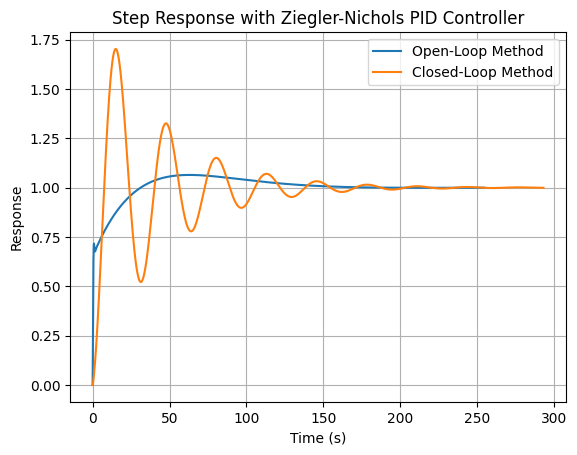

In [4]:
# Define the plant transfer function (example: second-order system)
G = ctl.TransferFunction([1], [1, 6, 8, 0])

# Open-Loop Method
Kp_ol, Ki_ol, Kd_ol = ziegler_nichols_open_loop(G)
print(f'Open-Loop Method PID parameters: Kp = {Kp_ol}, Ki = {Ki_ol}, Kd = {Kd_ol}')

# Closed-Loop Method
Kp_cl, Ki_cl, Kd_cl = ziegler_nichols_closed_loop(G)
print(f'Closed-Loop Method PID parameters: Kp = {Kp_cl}, Ki = {Ki_cl}, Kd = {Kd_cl}')

# Plot the step response for both methods
pid_ol = ctl.TransferFunction([Kd_ol, Kp_ol, Ki_ol], [1, 0])
system_ol = ctl.feedback(pid_ol * G, 1)
T_ol, yout_ol = ctl.step_response(system_ol)

pid_cl = ctl.TransferFunction([Kd_cl, Kp_cl, Ki_cl], [1, 0])
system_cl = ctl.feedback(pid_cl * G, 1)
T_cl, yout_cl = ctl.step_response(system_cl)

plt.figure()
plt.plot(T_ol, yout_ol, label='Open-Loop Method')
plt.plot(T_cl, yout_cl, label='Closed-Loop Method')
plt.xlabel('Time (s)')
plt.ylabel('Response')
plt.title('Step Response with Ziegler-Nichols PID Controller')
plt.legend()
plt.grid(True)
plt.show()